In [2]:
import numpy as np
import sympy as sp
import warnings #to hide warnings that arise when using 'dubious years'
warnings.filterwarnings('ignore')
from astroquery.jplhorizons import Horizons
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy import units as u

B.1. (Non-coding).

 f(E) = E - esin(E) - M, e > 0

 E ≤ M-e ⟹ E ≤ M + esin(E) ⟹ E - esin(E) - M = f(E) ≤ 0

 E ≥ M+e ⟹ E ≥ M + esin(E) ⟹ E - esin(E) - M = f(E) ≥ 0  

 E, M, sin(E), e are all continuous at any E, so by composition of continuous functions, f(E) is continuous everywhere. f(M-e) ≤ 0, f(M+e) ≥ 0 so by Intermediate Value Theorem, there exists ξ ∈ [M-e, M+e] such that f(ξ)=0. Therefore we conclude f(E) has a root in the interval [E₋, E₊] where E₋ = M-e, E₊ = M+e.□

B.2 (below):

 I define a simple fixed point iteration function, fixed_iter, to compute E, given M, by solving equation B3.4 in the form E = M + esinE. It also depends on variables tol and max_iter (representing proximity of successive approximations and maximum number of iterations respectively).I can speed up the function by increasing tol and decreasing max_iter. If the function converges within max_iter iterations, it outputs the root and the number of iterations required to reach that root. Otherwise, it raises an error. Note that I chose M as initial guess because it's in the middle of the interval where the root lies, so is likely to ensure efficient convergence.

In [3]:
def fixed_iter(M, e, tol, max_iter):
    iteration=0
    E_0 = M 
    for i in range(max_iter):
        iteration +=1
        E_1 = M + e*np.sin(E_0)
        if abs(E_1 - E_0) < tol:
            return E_1, iteration
        E_0 = E_1
    print(f"Error: Fixed point iteration did not converge within {max_iter} iterations")

Prove that it will converge using the Banach Contraction Mapping Theorem:

∀ E ∈ [M-e, M+e], esin(E) ∈ [-e, e] ⟹ g(E) = M + esin(E) ∈ [M-e, M+e] so we see that g maps [M-e, M+e] to [M-e, M+e], and [M-e, M+e] is bounded. Note also that |g'(E)| = |ecos(E)| ≤ e < 1 ∀ E ∈ [M-e, M+e], so we see that g satisfies both requirements of the derivative test and hence is a contraction. 

g is a contraction ⟹ (by Banach theorem) g has a unique fixed point E* (where g(E)=E) and the iteration above converges at least linearly to E* for any E₀ ∈ [M-e, M+e]□

B.3 (below):

 I define a function to compute E(M) for a fixed eccentricity e. We are looking for E such that E=esin(E)+M, so we are trying to find the root of the residual (f(E) = E-esin(E)-M). I used 'verbose' and 'if' so that when verbose is set to True, the function prints (iteration number, E approximation, residual) and (total number of iterations, final E) if it converges, and (total number of iterations, conclusion) if it doesn't converge, for clarity. 
 
 I defined f and its first two derivatives f1, f2, then substituted into Halley's method, avoiding division by zero (which would cause an error) by replacing any zero denominator by 10^-15 . My initial guess is E=M+esin(M) because this improves the rate of convergence for larger e (compared to E=M).

In [4]:
def eccentric_anomaly(M, e, verbose=False):
    E = M + e * np.sin(M)
    tol = 1e-15
    max_iter = 100
    converged = False
    for i in range(max_iter):
        residual = np.abs(E - e * np.sin(E) - M)
        if verbose:
            print(f"Iteration {i+1}: E = {E}, residual = {residual}")
        if residual < tol:
            converged = True
            if verbose:
                print(f"Converged after {i+1} iteration(s).")
            break
        f = E - e * np.sin(E) - M
        f1 = 1 - e * np.cos(E)
        f2 = e * np.sin(E)
        denominator = (2 * (f1)**2) - (f * f2)
        denominator = np.where(denominator == 0, 1e-15, denominator)
        E_new = E - (2 * f * f1) / denominator
        E = E_new
    if not converged and verbose:
        print(f"Warning: Did not converge within {max_iter} iterations.")
    if verbose:
        print(f"Final E: {E}")
    return E

B.4. (below): 

Applying my function to compute the eccentric anomoly for the M values below when e=0.5, with verbose=True so iterations are printed.

In [5]:
# e=0.5, M=0.1π:

eccentric_anomaly(0.1 * np.pi, 0.5, verbose=True)

# e=0.5, M=0.3π:

eccentric_anomaly(0.3 * np.pi, 0.5, verbose=True)

# e=0.5, M=0.7π:

eccentric_anomaly(0.7 * np.pi, 0.5, verbose=True)

# e=0.5, M=π:

eccentric_anomaly(np.pi, 0.5, verbose=True)

Iteration 1: E = 0.46866776254645304, residual = 0.07134055439274736
Iteration 2: E = 0.5941660230369996, residual = 9.780623452237958e-05
Iteration 3: E = 0.5939990238133245, residual = 1.6586731987899839e-13
Iteration 4: E = 0.5939990238136077, residual = 0.0
Converged after 4 iteration(s).
Final E: 0.5939990238136077
Iteration 1: E = 1.3469862932644117, residual = 0.08302095577871027
Iteration 2: E = 1.4380389463812175, residual = 3.918671023939169e-05
Iteration 3: E = 1.438080909968081, residual = 4.218847493575595e-15
Iteration 4: E = 1.4380809099680854, residual = 0.0
Converged after 4 iteration(s).
Final E: 1.4380809099680854
Iteration 1: E = 2.603623354700329, residual = 0.14831190578975972
Iteration 2: E = 2.4988895222721195, residual = 9.395123083599799e-05
Iteration 3: E = 2.4988224252354168, residual = 2.531308496145357e-14
Iteration 4: E = 2.4988224252353985, residual = 4.440892098500626e-16
Converged after 4 iteration(s).
Final E: 2.4988224252353985
Iteration 1: E = 3.141

np.float64(3.141592653589793)

B.5. (below):

 I use matplotlib to plot the eccentric anomoly, E as a function of M for different values of e. I chose to use a different colour for each value of e and include a key on the plot to make it visually appealing and easy to interpret. When plotting, I used list comprehesion for simplicity.


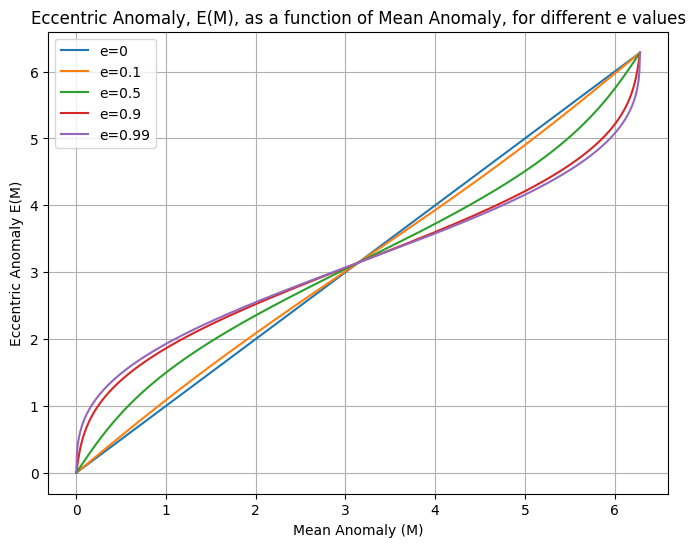

In [6]:
plt.figure(figsize=(8, 6))
xs = np.linspace(0, 2 * np.pi, 1000)
e_values = [0, 0.1, 0.5, 0.9, 0.99]
for e in e_values:
    ys = [eccentric_anomaly(x, e) for x in xs]
    plt.plot(xs, ys, label=f'e={e}')
plt.xlabel('Mean Anomaly (M)')
plt.ylabel('Eccentric Anomaly E(M)')
plt.title('Eccentric Anomaly, E(M), as a function of Mean Anomaly, for different e values')
plt.legend()
plt.grid(True)
plt.show()

For e=0, E(M)=M and the graph is linear as expected. For e>0, the sine term introduces a sinosoidal/non-linear shape resulting in an S-shaped graph. The curvature increases with e as the sine term becomes more dominant in the expression. The physical interpretation of this trend is that, as the eccentricity of the orbit increases, the distance from the sun varies more, and the planet moves more slowly when near the origin/sun (M=π), as a result of K2 (equal areas swept out in equal time intervals). This causes the curve to be flatter near E=π, as each change in M has a smaller impact on the eccentric anomaly when the planet moves at a lower speed, and steeper near M=0 and M=2π (moves faster when furthest away from the sun, each change in M has a greater impact on E).

B.6. (below):

 I use sympy to define the 3 rotation matrices for the described rotations, and to compute R, which is the formula for their composition. The order of matrix multiplication for computing R is R3 * R2 * R1 because R1 must be the first rotation to be applied. The 4 matrices are printed below.

In [7]:
omega, i, Omega = sp.symbols('omega i Omega')
R1 = sp.Matrix([[sp.cos(omega), -sp.sin(omega), 0], [sp.sin(omega), sp.cos(omega), 0], [0, 0, 1]])
R2 = sp.Matrix([[1, 0, 0], [0, sp.cos(i), -sp.sin(i)], [0, sp.sin(i), sp.cos(i)]])
R3 = sp.Matrix([[sp.cos(Omega), -sp.sin(Omega), 0], [sp.sin(Omega), sp.cos(Omega), 0], [0, 0, 1]])
R = sp.simplify(R3 * R2 * R1)
print("First Rotation (around z'-axis by ω):")
sp.pprint(R1)
print("\nSecond Rotation (around x'-axis by i):")
sp.pprint(R2)
print("\nThird Rotation (around z'-axis by Ω):")
sp.pprint(R3)
print("\nComposition of Rotations (R3 * R2 * R1):")
sp.pprint(R)

First Rotation (around z'-axis by ω):
⎡cos(ω)  -sin(ω)  0⎤
⎢                  ⎥
⎢sin(ω)  cos(ω)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

Second Rotation (around x'-axis by i):
⎡1    0        0   ⎤
⎢                  ⎥
⎢0  cos(i)  -sin(i)⎥
⎢                  ⎥
⎣0  sin(i)  cos(i) ⎦

Third Rotation (around z'-axis by Ω):
⎡cos(Ω)  -sin(Ω)  0⎤
⎢                  ⎥
⎢sin(Ω)  cos(Ω)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

Composition of Rotations (R3 * R2 * R1):
⎡-sin(Ω)⋅sin(ω)⋅cos(i) + cos(Ω)⋅cos(ω)  -sin(Ω)⋅cos(i)⋅cos(ω) - sin(ω)⋅cos(Ω)  ↪
⎢                                                                              ↪
⎢sin(Ω)⋅cos(ω) + sin(ω)⋅cos(Ω)⋅cos(i)   -sin(Ω)⋅sin(ω) + cos(Ω)⋅cos(i)⋅cos(ω)  ↪
⎢                                                                              ↪
⎣            sin(i)⋅sin(ω)                          sin(i)⋅cos(ω)              ↪

↪  sin(Ω)⋅sin(i) ⎤
↪                ⎥
↪  -sin(i)⋅cos(Ω)⎥
↪                ⎥
↪      cos(i)    ⎦


B.7. (below):

 In my predictions I used the composite rotation matrix R to transform the coordinates in the orbital plane (given), finding a predicted position at 11:08 on each day within the specified time period. I used np.linspace to split the time period into days. I then retrieved the observed positions (in AU) from the Horizons database and plotted them (on a 3d plot, using matplotlib) against the predicted positions and Earth's observed position (Horizon) for comparison.
 
 We can see that the predicted position of Mars aligns almost exactly with the observed positions of Mars, so our predictions are accurate. From the plot we can see that, relative to Earth's orbit, the orbit of Mars covers a larger area, is slightly more elliptical/eccentric and is at a slight tilt. This aligns with what we'd expect; research shows that Earth's eccentricity is 0.0167 which is significantly less than Mars', at 0.0934, and Mars reaches a max distance of 1.67AU from the Sun whereas Earth only reaches 1.02AU. Also, the true orbit of Mars is tilted by 1.8 degrees. 

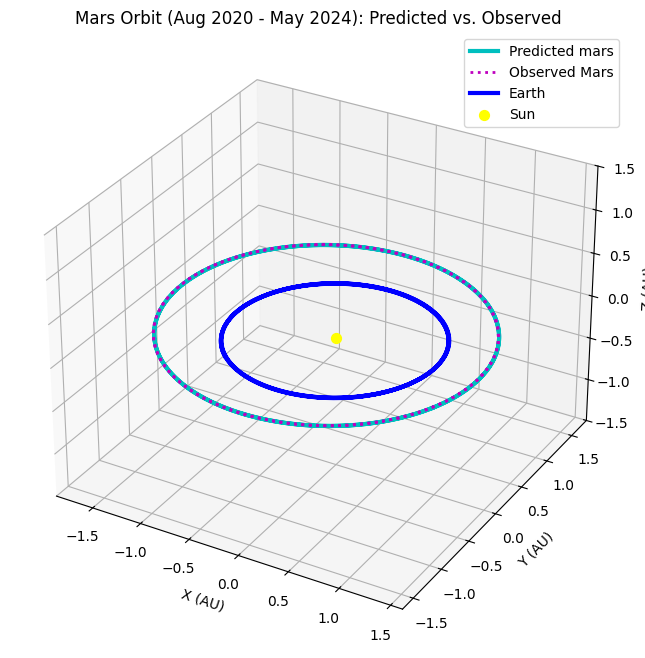

In [8]:
a = 1.523679 #(semi major axis, AU)
e = 0.0934 #(eccentricity)
T = 687 #(orbital period, days)
tau = Time('2024-05-08 11:08:00') 
start = Time('2020-08-03 11:08:00')
end = Time('2024-05-08 11:08:00') #(is equal to τ, time of periapsis)
#(ω, Ω, i = argument of periapsis, longitude of ascending node, inclination (all in rad))
def compute_R(omega, Omega, i): 
    R1 = np.array([[np.cos(omega), -np.sin(omega), 0], [np.sin(omega), np.cos(omega), 0], [0, 0, 1]])
    R2 = np.array([[1, 0, 0], [0, np.cos(i), -np.sin(i)], [0, np.sin(i), np.cos(i)]])
    R3 = np.array([[np.cos(Omega), -np.sin(Omega), 0], [np.sin(Omega), np.cos(Omega), 0], [0, 0, 1]])
    R = R3@R2@R1
    return R
R_mars = compute_R(5.0006, 0.8656, 0.0323) #(ω, Ω, i = 5.0006rad, 0.8656rad, 0.0323rad)

epochs = {'start': start.iso, 'stop': end.iso, 'step': '1d'} 
observed_mars = Horizons(id='499', location='500@0', epochs=epochs).vectors()
observed_earth = Horizons(id='399', location='500@0', epochs=epochs).vectors()

times = Time(observed_mars['datetime_jd'], format='jd')
predicted_mars = []
for t in times:
    M = (2*(np.pi)/T)*((t - tau).to(u.day).value)
    E = eccentric_anomaly(M, e, verbose=False)
    orbital_mars = np.array([a*(np.cos(E)-e), a*np.sqrt(1-e**2)*np.sin(E), 0])
    reference_mars = R_mars @ orbital_mars
    predicted_mars.append(reference_mars)
predicted_mars_array = np.array(predicted_mars, dtype=float)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-1.5, 1.5)
ax.plot(predicted_mars_array[:, 0], predicted_mars_array[:, 1], predicted_mars_array[:, 2], linestyle='-', label='Predicted mars', color='c', linewidth=3)
ax.plot(observed_mars['x'], observed_mars['y'], observed_mars['z'], linestyle=':', label='Observed Mars', color='m', linewidth=2)
ax.plot(observed_earth['x'], observed_earth['y'], observed_earth['z'], label='Earth', color='blue', linewidth=3)
ax.scatter([0], [0], [0], color='yellow', s=50, label='Sun')  
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')
ax.set_title('Mars Orbit (Aug 2020 - May 2024): Predicted vs. Observed')
ax.legend()
plt.show() 

B.8. (below): 

I utilised np.linalg.norm to find the Euclidian distance between the predicted and observed orbits of Mars from B.7. I then used np.argmax to find the index at which the max distance occurs, allowing me to identify and retreive the exact the time of occurrence. I have printed the distance and time below.

In [9]:
observed_mars_vec = np.column_stack([observed_mars['x'], observed_mars['y'], observed_mars['z']])
distances = np.linalg.norm(predicted_mars_array - observed_mars_vec, axis=1)
max_dist = np.max(distances)
max_dist_indexarray = np.argmax(distances)
max_time = times[max_dist_indexarray]
print(f"{max_dist} AU (precise)")
print(f"Maximum distance between predicted and observed Mars positions (rounded to 5dp) is {max_dist:.5f} AU")
print(f"Date when max distance occurs is {max_time.datetime.date()}")

0.01066538842956991 AU (precise)
Maximum distance between predicted and observed Mars positions (rounded to 5dp) is 0.01067 AU
Date when max distance occurs is 2023-01-02


B.9. (below):

 In this section, I used a very similar method to that in B.8, but applied to Halley's comet (using given parameters). My plot displays a highly eccentric elliptical orbit which is much larger than Earth's more circular orbit. We can also see that the predicted orbit is tilted. 
 
 These observations align well with the true comparison between the two orbits (research shows it is tilted 18 degrees relative to Earth, and has maximum distance from the sun 35AU whereas Earth reaches a maximum distance of 1.02AU from the sun). We can also see from the plot that Halley's comet does not form a closed loop in the specified time interval. This is because Halley's comet has an orbital period of approximately 76 Earth years, and we have only plotted over 50 years, resulting in an incomplete orbit. (Note for this plot the axes all have different scales, because, due to high eccentricity, if all scales were the same the orbits appeared incredibly small/difficult to see.)

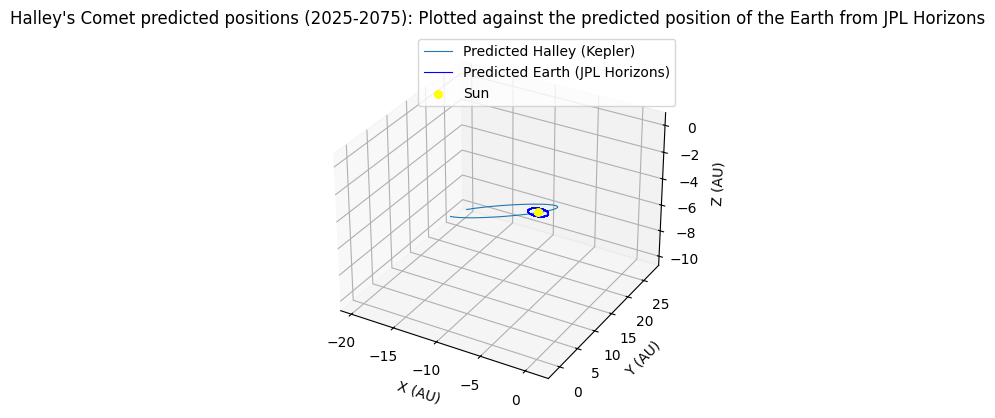

In [10]:
a_h = 17.93  #(semi major axis, AU)
e_h = 0.9679 #(eccentricity)
T_h = 27731.29  #(orbital period, days)
tau_h = Time('1986-08-06 08:06:00')
start_h = Time('2025-01-01 00:00:00')
end_h = Time('2075-01-01 00:00:00')
times_h = Time(np.linspace(start_h.jd, end_h.jd, 18263), format='jd')

R_h = compute_R(1.958, 1.031, 2.8308) #(ω, Ω, i = 1.958rad, 1.031rad, 2.8308rad)

epochs_h = {'start': start_h.iso, 'stop': end_h.iso, 'step': '1d'}
predicted_earth_h = Horizons(id='399', location='500@0', epochs=epochs_h).vectors()
predicted_earth_h_vec = np.column_stack([predicted_earth_h['x'], predicted_earth_h['y'], predicted_earth_h['z']])

predicted_halley = []
for t_h in times_h:
    M_h = (2*(np.pi)/T_h)*((t_h - tau_h).to(u.day).value)
    E_h = eccentric_anomaly(M_h, e_h, verbose=False)
    orbital_halley = np.array([a_h*(np.cos(E_h)-e_h), a_h*np.sqrt(1-e_h**2)*np.sin(E_h), 0])
    reference_halley = R_h @ orbital_halley
    predicted_halley.append(reference_halley)
predicted_halley_array = np.array(predicted_halley, dtype=float)

fig_h = plt.figure()
ax = fig_h.add_subplot(111, projection='3d')
ax.plot(predicted_halley_array[:, 0], predicted_halley_array[:, 1], predicted_halley_array[:, 2], label='Predicted Halley (Kepler)', linewidth=0.8)
ax.plot(predicted_earth_h['x'], predicted_earth_h['y'], predicted_earth_h['z'], label='Predicted Earth (JPL Horizons)', color='blue', linewidth=0.8)
ax.scatter([0], [0], [0], color='yellow', s=30, label='Sun')  
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')
ax.set_title("Halley's Comet predicted positions (2025-2075): Plotted against the predicted position of the Earth from JPL Horizons")
ax.legend()
plt.show() 

B.10. (below):

 I used np.linalg.norm to find the predicted euclidian distances between Halley's comet and the Earth's orbit. I used np.argmin to to find the index at which the min distance occurs, allowing me to identify and retreive the exact the time and distance of nearest approach. I have printed the time and distance below. I have plotted the distance between Earth and Halley's comet over time below, indicating with red and green lines the minimum such distance and the time at which it occurs on the plot. 
 
 We can see that the trend is that the distance decreases between 2025 and 2062, as Halley moves towards Earth/sun in its orbit, reaches its minimum, before gradually increasing again as Halley moves away from the Sun. The curve is steeper as you get closer to 2062, because the motion of Halley is more rapid when it is closer to the sun (due to Kepler's 2nd law). Throughout the motion, the distance oscillates as Earth completes its own orbit each year, but this oscillation is small compared to the overall change in distance (because Earth's orbit is so much smaller than Halley's).

Minimum predicted distance between Halley's Comet and Earth (rounded to 5dp) is 0.47662 AU
Date at which this minimum distance occurs is 2062-07-15


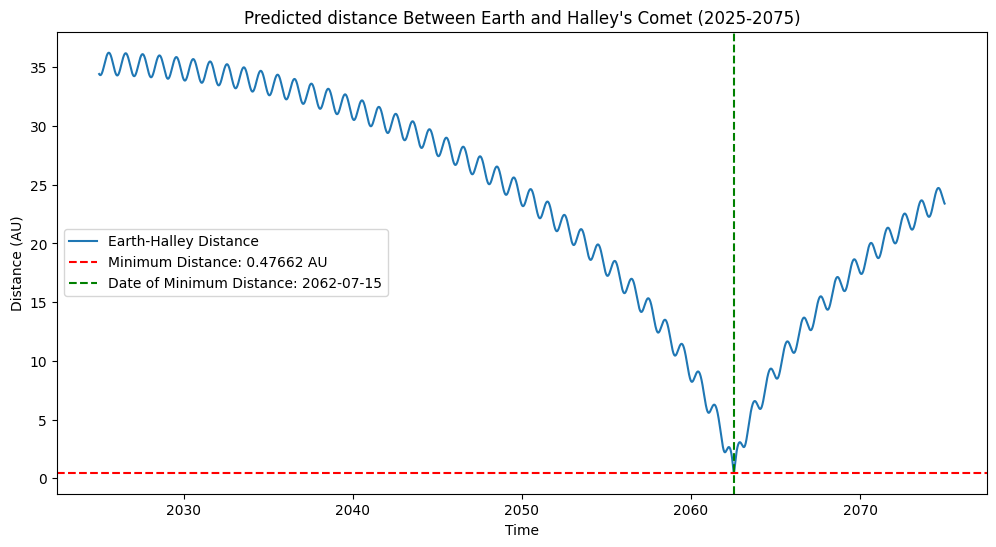

In [11]:

distances_h = np.linalg.norm(predicted_halley_array - predicted_earth_h_vec, axis=1)
min_dist_h = np.min(distances_h)
min_dist_indexarray_h = np.argmin(distances_h)
min_time_h = times_h[min_dist_indexarray_h]
print(f"Minimum predicted distance between Halley's Comet and Earth (rounded to 5dp) is {round(min_dist_h, 5)} AU")
print(f"Date at which this minimum distance occurs is {min_time_h.datetime.date()}")

plt.figure(figsize=(12, 6))
plt.plot(times_h.datetime, distances_h, label='Earth-Halley Distance')
plt.axhline(y=min_dist_h, color='r', linestyle='--', label=f'Minimum Distance: {min_dist_h:.5f} AU')
plt.axvline(x=min_time_h.datetime, color='g', linestyle='--', label=f'Date of Minimum Distance: {min_time_h.datetime.date()}')
plt.xlabel('Time')
plt.ylabel('Distance (AU)')
plt.title("Predicted distance Between Earth and Halley's Comet (2025-2075)")
plt.legend()
plt.show()
